In [1]:
import numpy as np

# 1. 의사결정나무의 분류방법
- 의사결정나무 (decision tree) : 여러가지 규칙을 순차적으로 적용, 독립 변수 공간을 분할 -> 분류 / 회귀분석 문제 풀이에 사용<br>

<분류방법><br>
1) 독립변수 중 1개 선택, 해당 독립변수에 대한 기준값(threshold : 분류규칙) 설정<br>
2) 전체 데이터를
    - 독립변수 : 실수 -> "독립변수 > 기준값", "독립변수 < 기준값" 으로 나눠 엔트로피 측정
    - 독립변수 : 키워드 -> "키워드가 있다", "키워드가 없다" 로 나눠 엔트로피 측정

3) 1,2번의 단계를 기준값을 바꿔가면서 한번씩 적용 (="독립변수 내 데이터 개수만큼")<br>
4) 다른 독립변수를 선택, 해당 독립변수에 대하여 1~3번 단계를 적용<br>
5) 전체 독립변수에 대해 1~4의 단계를 진행 // 진행한 전체 단계에서 가장 엔트로피가 작은 독립변수 / 기준값에 근거하여 분류<br>

1)~5)의 단계 1번 = max_depth의 값 1

# 2. 의사결정나무를 통한 예측
- 규칙결정방법 : 모든 독립변수, 모든 기준값에 대하여 Information Gain을 구하고, 가장 I.G를 크게 만드는 독립변수, 기준값을 선택
- Information Gain : 데이터분리에 의해 확률 변수의 엔트로피가 얼마나 감소하였는가.<br>
    $IG[Y,X] = H[Y] - H[Y|X]$ : 클수록 좋은 분류!

# 3. Scikit-Learn의 의사결정 나무 클래스 : DecisionTreeClassifier

<수식><br>
from sklearn.tree import DecisionTreeClassifier<br>
tree1 = DecisionTreeClassifier(criterion="entrophy", max_dept="1")

-> 계속 반복해서 데이터가 한쪽으로 다 쏠리는 순간 stop<br>
   (오분류데이터가 너무 조금 남게 되면, 더이상 분류 안하게 설정할 수 있음.)
   
<장점> : 분류문제의 해석이 쉽다. (한번에 하나의 기준)<br>
<단점> : 오버피팅이 잘된다. -> 반드시 crossvalidation진행할 것.

# 4. 예제 - iris

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(criterion="entropy", max_depth=1, random_state=0).fit(X,y)

In [4]:
#DecisionTree시각화를 위한 코드 작성

import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file = dot_buf, feature_names=iris.feature_names[2:])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)
    
    
def plot_decision_regions(X, y, model, title):
    
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)
        
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

In [ ]:
#Depth = 1

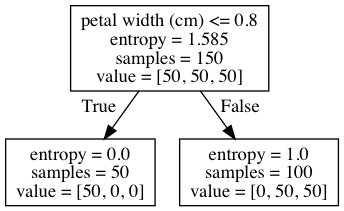

In [5]:
draw_decision_tree(tree1)

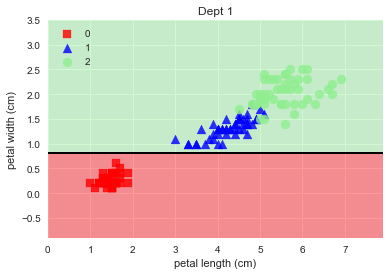

In [7]:
plot_decision_regions(X,y,tree1,"Dept 1")
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]])

In [ ]:
#Depth = 2

In [10]:
tree2 = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=0).fit(X,y)

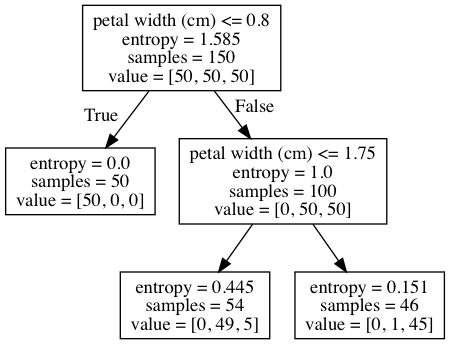

In [11]:
draw_decision_tree(tree2)

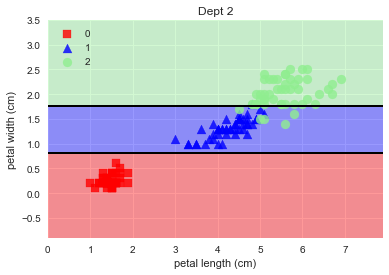

In [12]:
plot_decision_regions(X,y,tree2,"Dept 2")
plt.show()

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, tree2.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

In [ ]:
#Depth=3

In [14]:
tree3 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0).fit(X,y)

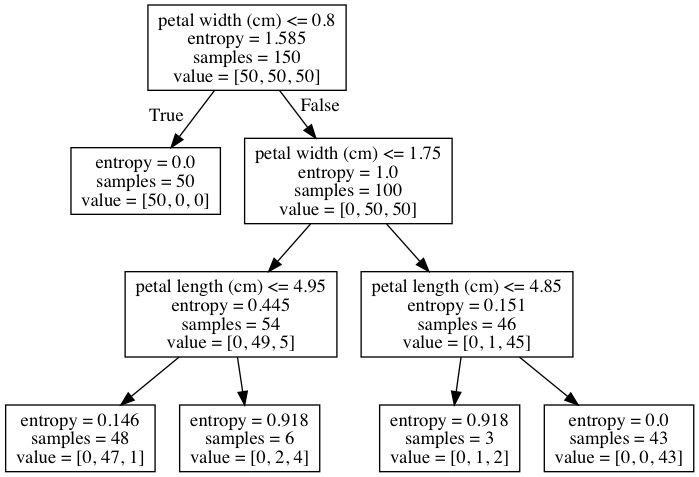

In [15]:
draw_decision_tree(tree3)

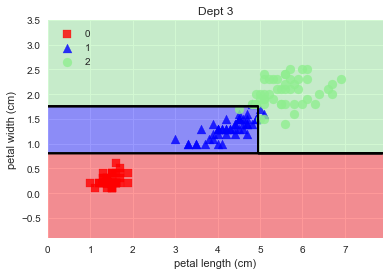

In [16]:
plot_decision_regions(X,y,tree3,"Dept 3")
plt.show()

In [17]:
confusion_matrix(y, tree3.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [ ]:
#Depth = 4

In [18]:
tree4 = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=0).fit(X,y)

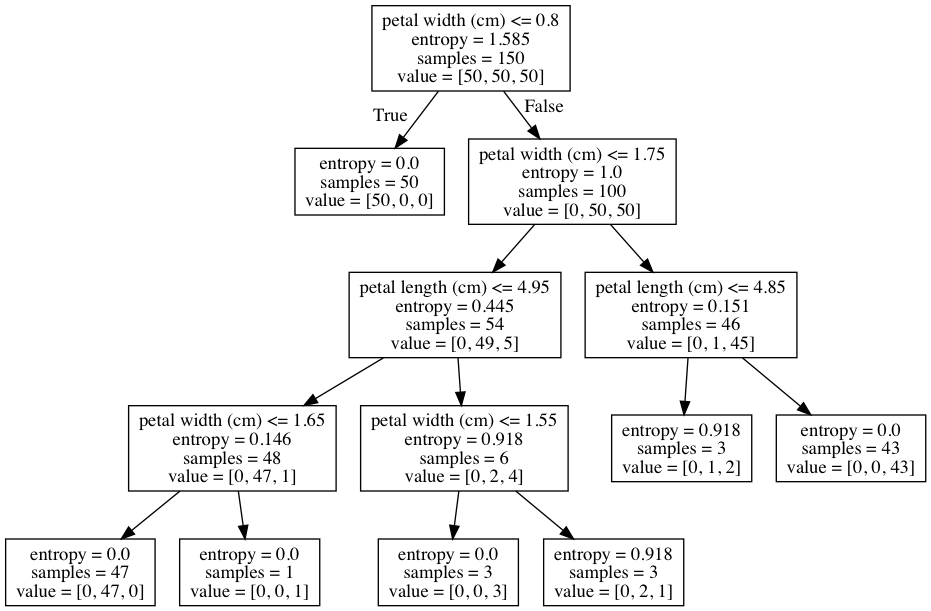

In [19]:
draw_decision_tree(tree4)

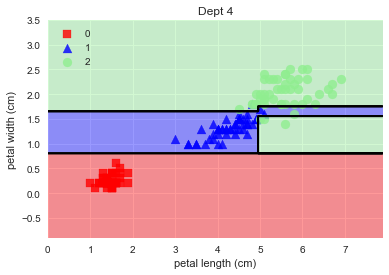

In [20]:
plot_decision_regions(X,y,tree4,"Dept 4")
plt.show()

In [21]:
confusion_matrix(y, tree4.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])

In [ ]:
#Depth5

In [22]:
tree5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0).fit(X,y)

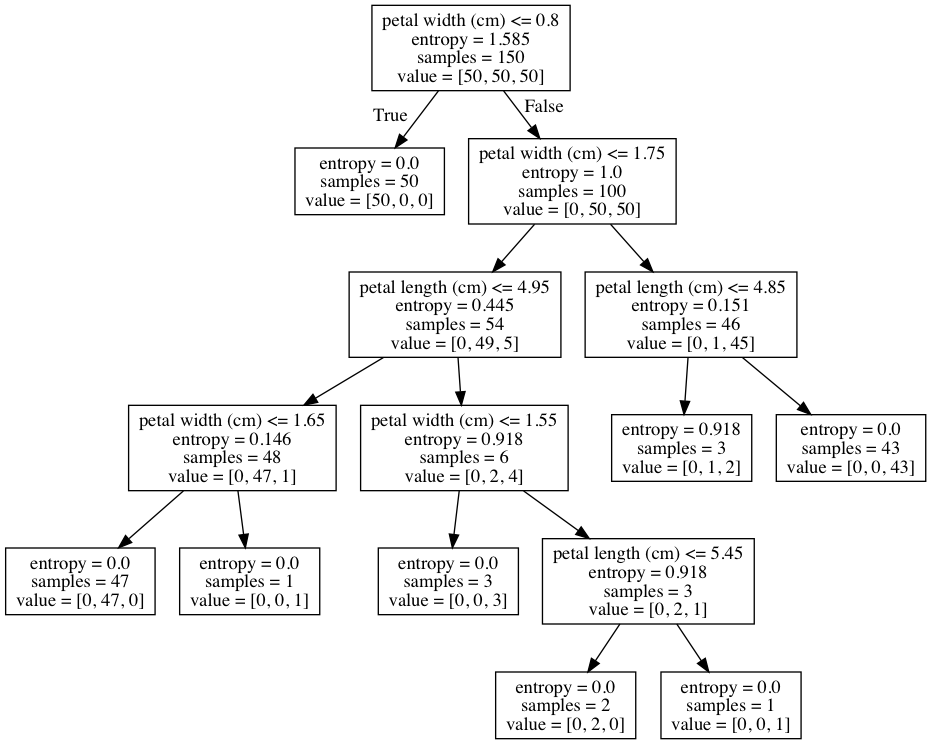

In [23]:
draw_decision_tree(tree5)

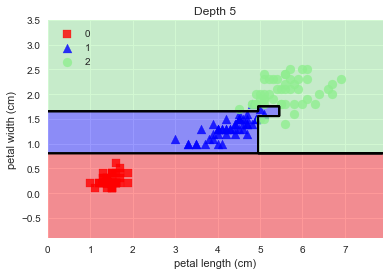

In [24]:
plot_decision_regions(X, y, tree5, "Depth 5")
plt.show()

In [25]:
confusion_matrix(y, tree5.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]])

# 5. 예제 - Titanic

In [26]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [28]:
#타이타닉에서 pclass, age, sex - 독립변수 / 생존여부 - 종속변수 로 추림
feature_names = ["pclass", "age", "sex"]
dfX = df[feature_names].copy()
dfy = df["survived"].copy()
dfX.tail()

,pclass,age,sex
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male
890,3,32.0,male


In [29]:
#LabelEncoder - 성별 1,0으로 인코딩
from sklearn.preprocessing import LabelEncoder
dfX["sex"] = LabelEncoder().fit_transform(dfX["sex"])
dfX.tail()

,pclass,age,sex
886,2,27.0,1
887,1,19.0,0
888,3,NaN,0
889,1,26.0,1
890,3,32.0,1


In [30]:
# age변수 NaN값 제거 (평균으로 때려넣음..)
dfX["age"].fillna(dfX["age"].mean(),inplace=True)
dfX.tail()

,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [32]:
#실수값으로 인식하지 않도록 카테고리변수인 pclass를 label_binarizer로 활용, 변경해줌.
from sklearn.preprocessing import LabelBinarizer
dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX["pclass"]),
                   columns = ['c1', 'c2', 'c3'], index = dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)
del(dfX["pclass"])
dfX.tail()

,age,sex,c1,c2,c3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


In [33]:
#향후 선택한 분류기준에 대한 평가를 위해 train/test데이터로 쪼갬
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size = 0.25, random_state=0)

In [34]:
#max_depth = 3, 5개 미만 남으면 pass기준으로 의사결정나무 그리기
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=5).fit(X_train, y_train)

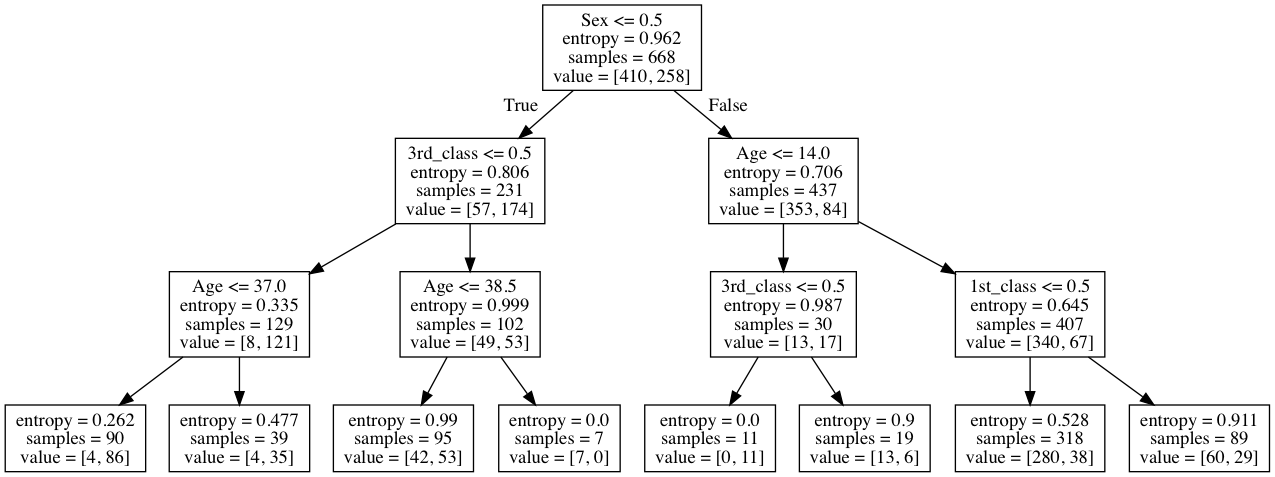

In [35]:
command_buf = io.StringIO() 
export_graphviz(model, out_file=command_buf, feature_names=['Age','Sex','1st_class','2nd_class','3rd_class']) 
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0] 
image = graph.create_png()
Image(image)

In [37]:
#train데이터 기준 분류 상태
confusion_matrix(y_train, model.predict(X_train))

array([[360,  50],
       [ 73, 185]])

In [40]:
#train데이터 기준 분류 모델의 점수
from sklearn.metrics import classification_report
print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          0       0.83      0.88      0.85       410
          1       0.79      0.72      0.75       258

avg / total       0.81      0.82      0.81       668



In [38]:
#test데이터 기준 분류 상태
confusion_matrix(y_test, model.predict(X_test))

array([[119,  20],
       [ 25,  59]])

In [41]:
#test데이터 기준 분류 모델의 점수
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.83      0.86      0.84       139
          1       0.75      0.70      0.72        84

avg / total       0.80      0.80      0.80       223

